In [8]:
# -*- coding: utf-8 -*-
"""Category_Detection.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/17MxX6AGK8jP-Q2Iw8JRUwZMmlszqCX3F
"""
import pandas as pd
import os
import tensorflow as tf
import spacy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import normalize,LabelEncoder,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
# df2=pd.read_csv('C:/Users/SHIVAM/Desktop/files/xnxx.csv')
df2.__sizeof__()

320742588

In [11]:
file_path="porn_dataset.csv"
df=pd.read_csv(file_path)
df.dropna(inplace=True)
# LE=LabelEncoder()
# df['category_code']=LE.fit_transform(df['category'])
labels=pd.get_dummies(df['category']).values
# labels=df['category_code']
# df.head()

In [9]:
text_length={i:len(line.split(' ')) for i,line in enumerate(df['title'])}

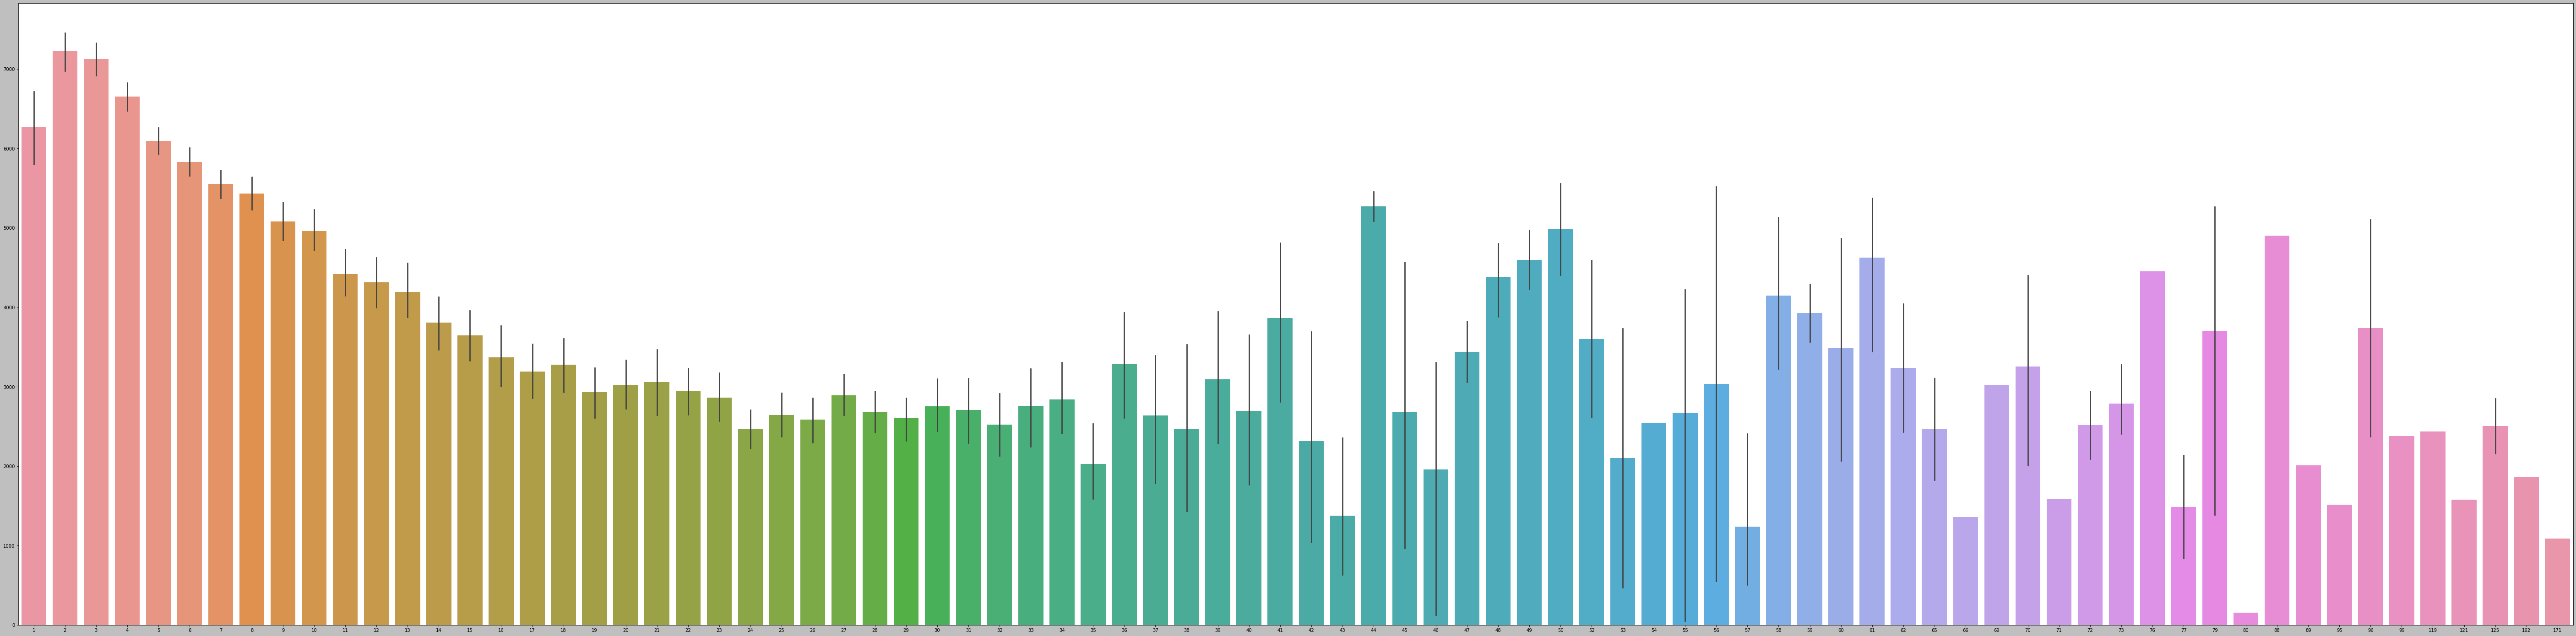

In [31]:
plt.style.use('grayscale')
plt.figure(figsize=(100,25))
sns.barplot(y=list(text_length.keys()),x=list(text_length.values()))

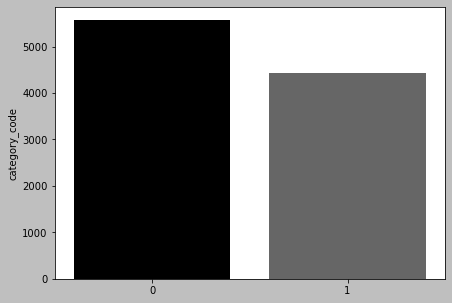

In [30]:
cat_freq=df.category_code.value_counts()
classes=df.category_code.unique()
plt.style.use('grayscale')
plt.figure(figsize=(7,5))
ax=sns.barplot(x=classes,y=cat_freq)

In [52]:
df.title=df.title.apply(lambda x:' '.join(re.sub('[\d\W]',' ',x.lower()).strip().split()))
df.head()

,Unnamed: 0,title,category
0,0,go until jurong point crazy available only in ...,general
1,1,ok lar joking wif u oni,general
2,2,free entry in a wkly comp to win fa cup final ...,general
3,3,u dun say so early hor u c already then say,general
4,4,nah i don t think he goes to usf he lives arou...,general


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [86]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1,2),norm='l1',max_features=200),
                         
                         RandomForestClassifier(min_samples_leaf=1, min_samples_split=6, n_estimators=120, 
                             criterion='gini', bootstrap='False', n_jobs= -1))
pipe.fit(df.title,df.category)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=200,
                                 min_df=1, ngram_range=(1, 2), norm='l1',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_...
                 RandomForestClassifier(bootstrap='False', ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=N

In [92]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from imblearn.metrics import classification_report_imbalanced
predict=pipe.predict(xtest)
print(pipe.score(ytest,predict))
print(accuracy_score(ytest,predict))
print(classification_report_imbalanced(ytest, predict))

0.4475
0.976
                   pre       rec       spe        f1       geo       iba       sup

    general       0.99      0.97      0.99      0.98      0.98      0.95      1133
       porn       0.96      0.99      0.97      0.97      0.98      0.96       867

avg / total       0.98      0.98      0.98      0.98      0.98      0.96      2000



In [96]:
# import pickle
# pickle.dump(pipe,open('porn_detection_model.pkl','wb'))
model=pickle.load(open('porn_detection_model.pkl','rb'))

In [ ]:
import keyboard
import os
import psutil
import pickle
from tensorflow.keras.models import load_model
new_model = pickle.load(open('porn_detection_model.pkl','rb'))
print('model_loaded')
def firewall(text):
    p=new_model.predict([text])
    process_ids=[proc.pid for proc in psutil.process_iter() if 'chrome' in proc.name()]
    if p=='porn':
        keyboard.write('inappropriate',1)
        for pr_id in process_ids: 
            try:
                os.kill(pr_id,2)
            except Exception as e:
                print(e)
    else:
        print(text,p)
def generate_events():
    while True:
        yield keyboard.read_event()   # yield is used to return a value while didn't terminate execution of function 
strings = keyboard.get_typed_strings(generate_events())
while True:
    try:
        text=next(strings)
        if text=='exit':
            break
        else:
            firewall(text)
    except Exception as e:
        print(e)

model_loaded
bthis is my favorite movie ['general']
i like to see movie on youtube ['general']
but i dont like to see porn ['general']
porn movies are so hot ['general']


In [11]:
!pip install pyautogui

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.50-py3-none-any.whl size=35133 sha256=29665d0e8295390007cf0151c33106d63634e3cac203bc6f29130bbfbe508908
  Stored in directory: c:\users\shivam\appdata\local\pip\cache\wheels\07\ce\46\fc8cb97702efc4e1d64336f9ac54d2d7d75674def781c20b06
  Created wheel for pymsgbox: filename=PyMsgBox-1.0.8-py3-none-any.whl size=7418 sha256=92f5b3061692d9627729f6f486b3356f74cfc283d33d2ddd50c7c4f502b54601
  Stored in directory: c:\users\shivam\appdata\local\pip\cache\wheels\1e\c7\49\1983eeafb14e43c8a28a3e72a03ddcb14dd06a51f1823e13ed
  Created wheel for PyTweening: filename

In [5]:
!pip install tesseract-ocr

  ERROR: Command errored out with exit status 1:
   command: 'c:\program files (x86)\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SHIVAM\\AppData\\Local\\Temp\\pip-install-ttsk26qv\\tesseract-ocr\\setup.py'"'"'; __file__='"'"'C:\\Users\\SHIVAM\\AppData\\Local\\Temp\\pip-install-ttsk26qv\\tesseract-ocr\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SHIVAM\AppData\Local\Temp\pip-wheel-g7ryy_8t'
       cwd: C:\Users\SHIVAM\AppData\Local\Temp\pip-install-ttsk26qv\tesseract-ocr\
  Complete output (8 lines):
  running bdist_wheel

Defaulting to user installation because normal site-packages is not writeable
  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr: started
    Running setup.py install for tesseract-ocr: finished with status 'error'



  running build
  running build_py
  file tesseract_ocr.py (for module tesseract_ocr) not found
  file tesseract_ocr.py (for module tesseract_ocr) not found
  running build_ext
  building 'tesseract_ocr' extension
  error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/
  ----------------------------------------
  ERROR: Failed building wheel for tesseract-ocr
    ERROR: Command errored out with exit status 1:
     command: 'c:\program files (x86)\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SHIVAM\\AppData\\Local\\Temp\\pip-install-ttsk26qv\\tesseract-ocr\\setup.py'"'"'; __file__='"'"'C:\\Users\\SHIVAM\\AppData\\Local\\Temp\\pip-install-ttsk26qv\\tesseract-ocr\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\SHIVAM

In [3]:
import pyautogui
import cv2
import numpy as np
import pytesseract
image = pyautogui.screenshot()
# myScreenshot.save('name.png')

# # ocr 
pytesseract.pytesseract.tesseract_cmd = 'C:/OCR/Tesseract-OCR/tesseract.exe'
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR) 
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(image, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
out_below = pytesseract.image_to_string(img)
print("OUTPUT:", out_below)

TesseractNotFoundError: C:/OCR/Tesseract-OCR/tesseract.exe is not installed or it's not in your PATH

Defaulting to user installation because normal site-packages is not writeable
